Uso de cómputo simbólico para resolver gráficamente

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')
plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (5,3)
# %config InlineBackend.figure_format='retina'
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)

In [2]:
# declarar variable c
c = sp.symbols('c', real=True)
# función de utilidad
uc = (400*c)**(1/2) - (1/80)*c
# diferenciar con respecto a c
udiff_c = sp.diff(uc, c)
udiff_c

10.0*c**(-0.5) - 0.0125

In [3]:
# resolver diferencial con respecto a c
c_optim = sp.solve(udiff_c, c) # resolver para c
c_optim[0] # regresa lista

640000.000000000

Declarar función general
$$
u(c) = \sqrt(ac) - (1/80)c
$$

In [4]:
c, a = sp.symbols('c a', real=True)
uc = (a*c)**(1/2) - (1/80)*c
uc

-0.0125*c + (a*c)**0.5

In [5]:
udiff_c = sp.diff(uc, c) # diferenciar
c_optim = sp.solve(udiff_c, c) # resolver para c
ucopt_lambda = sp.lambdify(a, c_optim) #convertir expresión en función lambda
ucopt_lambda(400) # evaluar para a=640k


[640000.0]

In [6]:
# convertir función original en lambda con argumentos a y c
uc_lambda = sp.lambdify([a, c], uc)
# crear vector de c
cvec = np.arange(0, 2e6, 0.5)
# evaluar función lambda para a=400 y c
ud_eval = [uc_lambda(400, ci) for ci in cvec]

640000.0


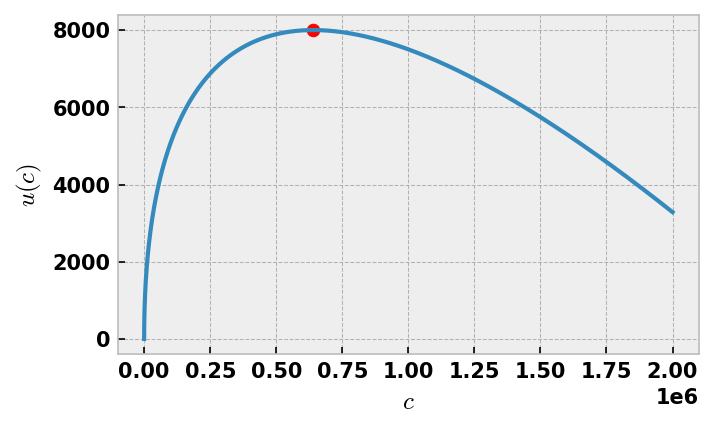

In [7]:
# graficar y colocar valor óptimo usando u-c-optima con a=400
plt.plot(cvec, ud_eval)
plt.scatter(ucopt_lambda(400)[0], 
            uc_lambda(400, ucopt_lambda(400)[0]), c='red')
plt.xlabel(r'$c$')
plt.ylabel(r'$u(c)$')
print(ucopt_lambda(400)[0])

In [8]:
# uc_lambda = sp.lambdify([a, c], uc) ya está declarada
a = 1600
cvec = np.arange(0, 6e6, 10) # crear vector de 0 a 6M cada 10
# evaluar
ud_eval = [uc_lambda(a, ci) for ci in cvec]

Text(1100000.0, 19250.0, '$c_{lim}=1000000.0$')

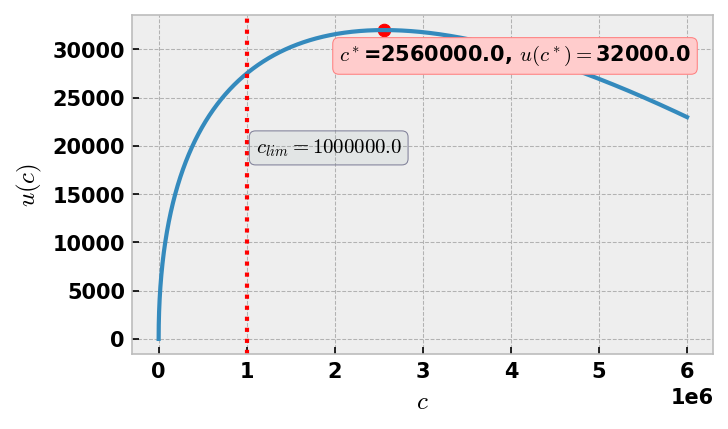

In [9]:
plt.plot(cvec, ud_eval)
plt.scatter(ucopt_lambda(a)[0], 
            uc_lambda(a, ucopt_lambda(a)[0]), c='red')
plt.axvline(x=1e6, c='r', ls=':')
plt.xlabel(r'$c$')
plt.ylabel(r'$u(c)$')
arg_max_c = cvec[np.argmax(ud_eval)]
plt.text(arg_max_c*0.8, np.max(ud_eval)*0.9, 
         s=f'$c^*$={round(arg_max_c,2)}, $u(c^*)=${round(np.max(ud_eval),2)}',
         bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(1., 0.8, 0.8),
                   )
        )
c_lim = 1e6
plt.text(c_lim*1.1, uc_lambda(a, c_lim)*0.7, 
         s=f'$c_{{lim}}={c_lim}$',
         bbox=dict(boxstyle="round",
                   ec=(0.5, 0.5, 0.6),
                   fc=(0.5, 0.6, 0.6, 0.1),
                   )
        )